In [1]:
from pathlib import Path
import pickle


path = '/home/jovyan/RNAModif/rnamodif/util_notebooks/2022_chr_split.pickle'
with open(path, 'rb') as handle:
    split_dict = pickle.load(handle)

pos_files_5eu_chr1 = split_dict['5eu_2022_nia_chr1']
neg_files_5eu_chr1 = split_dict['UNM_2022_nia_chr1']

pos_files_5eu_chr2X = split_dict['5eu_2022_nia_chr2-X']
neg_files_5eu_chr2X = split_dict['UNM_2022_nia_chr2-X']

print('5eu_2022_nia_chr2-X', len(pos_files_5eu_chr2X))
print('UNM_2022_nia_chr2-X', len(neg_files_5eu_chr2X))

fiveEU_nanoid_path = Path('/home/jovyan/local_store/nanoid/20180514_1054_K562_5EU_1440_labeled_run')
pos_files_nanoid_24h = list(fiveEU_nanoid_path.rglob('*.fast5'))

fiveEU_nanoid_path_neg = Path('/home/jovyan/local_store/nanoid/20180403_1208_K562_5EU_0_unlabeled_III_run')
neg_files_nanoid = list(fiveEU_nanoid_path_neg.rglob('*.fast5'))

pos_2020_path = Path('/home/jovyan/local_store/store/seq/ont/experiments/20201016_hsa_dRNASeq_HeLa_5EU_polyA_REL5_short_1/runs')
pos_files_2020 = list(pos_2020_path.rglob('*.fast5'))

neg_2020_path = Path('/home/jovyan/local_store/store/seq/ont/experiments/20201016_hsa_dRNASeq_HeLa_dmso_polyA_REL5_short_1/runs')
neg_files_2020 = list(neg_2020_path.rglob('*.fast5'))

valid_exp_to_files_pos = {'5eu_2020_pos':pos_files_2020, 'Nanoid_pos':pos_files_nanoid_24h, '5eu_2022_chr1_pos':pos_files_5eu_chr1}
valid_exp_to_files_neg = {'UNM_2020':neg_files_2020, 'Nanoid_neg':neg_files_nanoid, '5eu_2022_chr1_neg':neg_files_5eu_chr1}

for k,v in valid_exp_to_files_pos.items():
    print(k, len(v))

for k,v in valid_exp_to_files_neg.items():
    print(k, len(v))



5eu_2022_nia_chr2-X 891131
UNM_2022_nia_chr2-X 1758977
5eu_2020_pos 150
Nanoid_pos 177088
5eu_2022_chr1_pos 73607
UNM_2020 203
Nanoid_neg 216906
5eu_2022_chr1_neg 176093


In [15]:
from rnamodif.data_utils.dataloading_5eu import nanopore_datamodule_5eu, IterableDatasetMixed
from torch.utils.data import DataLoader
from rnamodif.data_utils.generators import alternating_gen

train_dset = IterableDatasetMixed(pos_files_5eu_chr2X, neg_files_5eu_chr2X, 4096, generator_type=alternating_gen)
valid_dset = IterableDatasetMixed(pos_files_nanoid_24h, neg_files_nanoid, 4096, generator_type=alternating_gen)
train_dl = iter(DataLoader(train_dset, batch_size=8))
valid_dl = iter(DataLoader(valid_dset, batch_size=8))



In [38]:
import numpy as np
tv = []
vv = []
for _ in range(1000):
    tr = next(train_dl)[0].numpy().reshape(-1,4096)
    for i in range(8):
        tv.append(np.var(tr[i]))
    va = next(valid_dl)[0].numpy().reshape(-1,4096)
    for i in range(8):
        vv.append(np.var(va[i]))


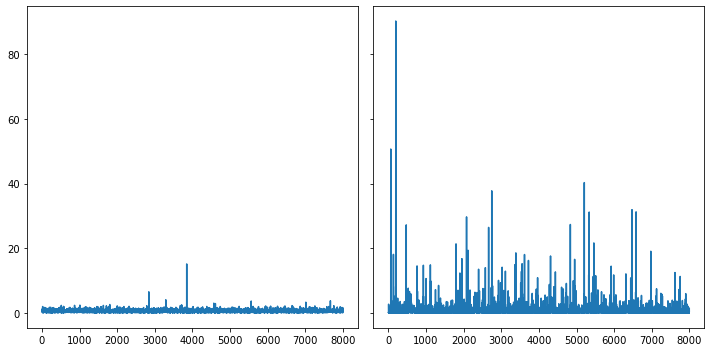

In [51]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, tight_layout=True, figsize=(10,5))
# axs[0].set_xlim([0,5])
# axs[1].set_xlim([0,5])
# axs[0].hist(tv, bins=20)
# axs[1].hist(vv, bins=2000)
axs[0].plot(tv)
axs[1].plot(vv)
pass


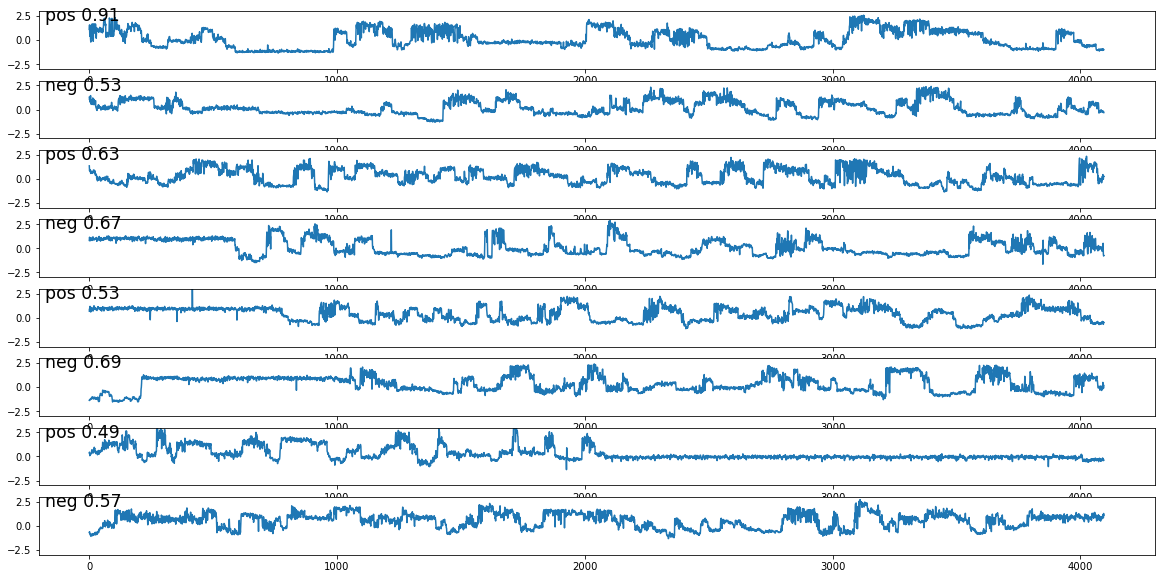

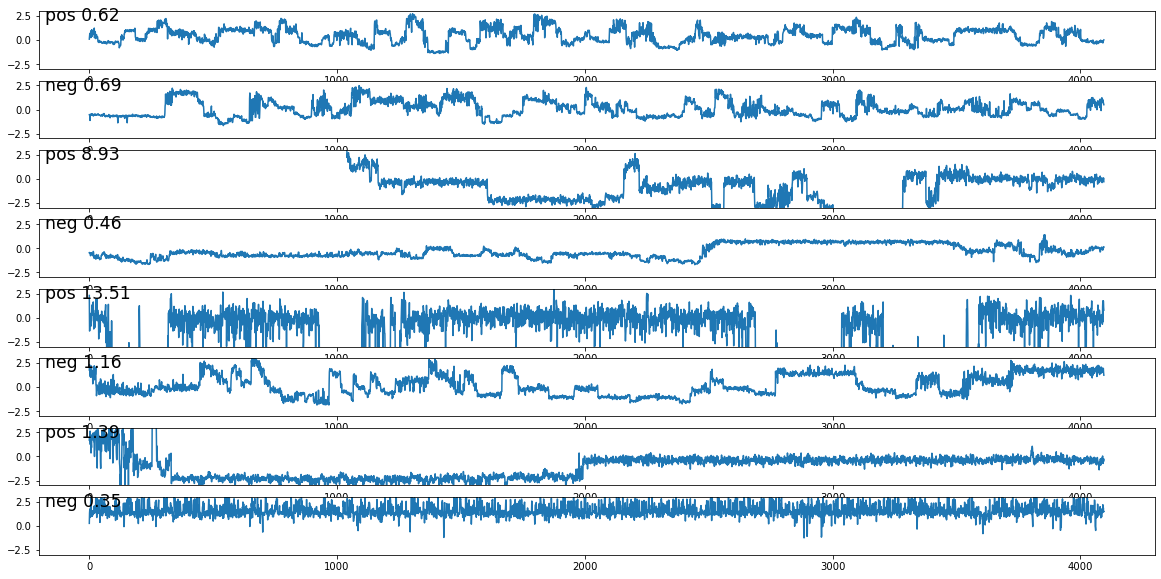

In [25]:
from matplotlib import pyplot as plt
import numpy as np
train_batch = next(train_dl)
val_batch = next(valid_dl)

def plot_batch(batch, val=False):
    x,y,exp = batch
    bs = x.size()[0]
    x = x.numpy().reshape(-1,4096)
    fig,axs = plt.subplots(bs, figsize=(20,10), sharey=True)
    for i in range(bs):
        axs[i].plot(x[i])
        axs[i].text(-180,2,f'{exp[i]} {np.var(x[i]):.2f}',fontsize='xx-large')
        axs[i].set_ylim([-3, 3])
    plt.show()
    
plot_batch(train_batch)
plot_batch(val_batch)